In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [5]:
def def_model(in_shape, nb_classes):
    model = Sequential()
    model.add(Conv2D(32,
                     kernel_size=(3, 3),
                     activation='relu',
                     input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    return model

def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model

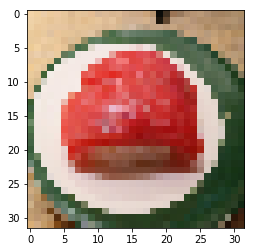

この写真は、  寿司 で、カロリーは 588 kcal
可能性は、 100 %


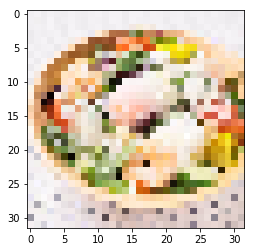

この写真は、  サラダ で、カロリーは 118 kcal
可能性は、 100 %


In [6]:
target_image = 'test-sushi.jpg'

im_rows = 32
im_cols = 32
im_color = 3
in_shape = (im_rows, im_cols, im_color)
nb_classes = 3

LABELS = ['寿司', 'サラダ', '麻婆豆腐']
CALORIES = [588, 118, 648]

model = get_model(in_shape, nb_classes)
model.load_weights('./image/photos-model-light.hdf5')

def check_photo(path):
    img = Image.open(path)
    img = img.convert('RGB')
    img = img.resize((im_cols, im_rows))
    plt.imshow(img)
    plt.show()
    
    x = np.asarray(img)
    x = x.reshape(-1, im_rows, im_cols, im_color)
    x = x / 255
    
    pre = model.predict([x])[0]
    idx = pre.argmax()
    per = int(pre[idx] * 100)
    return (idx, per)

def check_photo_str(path):
    idx, per = check_photo(path)
    print('この写真は、 ', LABELS[idx], 'で、カロリーは', CALORIES[idx], 'kcal')
    print('可能性は、', per, '%')
    
check_photo_str('test_sushi.jpg')
check_photo_str('test_salad.jpg')